# Task 1

Extract a subset of traning samples from the MNIST handwriten signatures. Create a small convolution neural network with two convolution layers, two pool layers, flatten, dense layer and softmax layer to classify the images. Find out classification error for learning set and testing set.



In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as sk1
import sklearn.preprocessing as sk2
import sklearn.model_selection as sk
import pandas as pd

In [5]:
(x_train, y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

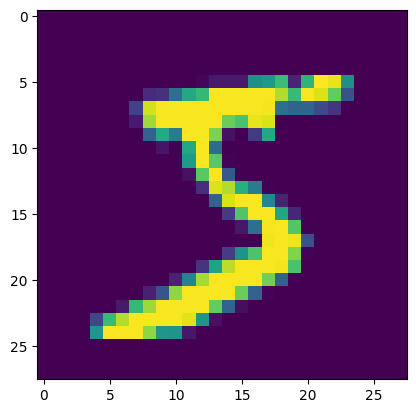

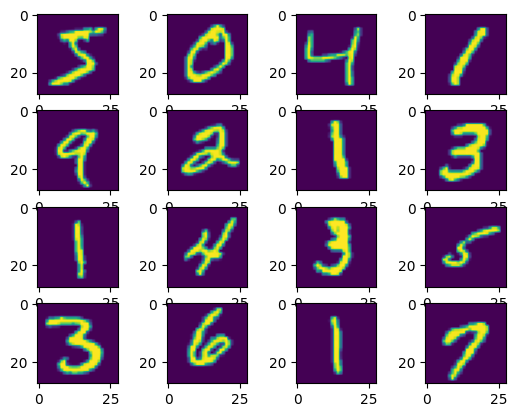

In [6]:
plt.imshow(x_train[0])
plt.show()
for i in range (16) :
    #print(i)
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[i])

In [7]:
pand_y_train = pd.DataFrame(y_train)
pand_y_test = pd.DataFrame(y_test)
print(pand_y_train.value_counts())
print(np.unique(y_train ,return_counts = True))
#print(y_train.value_count())

0
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


In [8]:
#when you combine the two splits back 
total_train = np.concatenate((x_train,x_test))
total_train1 = np.vstack((x_train,x_test))
total_train1 = np.vstack((x_train,x_test))
print(x_train.shape)
print(x_test.shape)
print(total_train.shape)
print(total_train1.shape)

(60000, 28, 28)
(10000, 28, 28)
(70000, 28, 28)
(70000, 28, 28)


In [7]:
#hotencoding 
'''
pand_y_train = pd.get_dummies(pand_y_train,columns= [0])
#print(pand_y_train)
print(pand_y_test)
pand_y_test =pd.get_dummies(pand_y_test,columns= [0])
print(pand_y_test)
y_train = pand_y_train.to_numpy()
y_test = pand_y_test.to_numpy()

#print(y_train)
print(y_test)
'''

'\npand_y_train = pd.get_dummies(pand_y_train,columns= [0])\n#print(pand_y_train)\nprint(pand_y_test)\npand_y_test =pd.get_dummies(pand_y_test,columns= [0])\nprint(pand_y_test)\ny_train = pand_y_train.to_numpy()\ny_test = pand_y_test.to_numpy()\n\n#print(y_train)\nprint(y_test)\n'

In [9]:
encoder = sk2.OneHotEncoder(sparse_output=False)
y_train = encoder.fit_transform(y_train.reshape(-1,1))
y_test = encoder.transform(y_test.reshape(-1,1))
print(y_train[:3,:])


[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [10]:
# Reshaping the data to include the channel dimension


# Checking shapes (for debugging purposes)
print(x_train.shape)
print(y_train.shape)

# Model definition
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(20, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(tf.keras.layers.Conv2D(10, (3, 3), padding='same', dilation_rate=(2, 2), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(3, 3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
model.fit(x_train, y_train, epochs=2)


(60000, 28, 28)
(60000, 10)


/Users/esmaelmoataz/miniforge3/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-03 20:55:39.123532: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-11-03 20:55:39.123843: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-11-03 20:55:39.124082: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-11-03 20:55:39.124130: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-03 20:55:39.124178: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factor

Epoch 1/2


2024-11-03 20:55:39.882612: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - accuracy: 0.7895 - loss: 1.5656
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9685 - loss: 0.1052


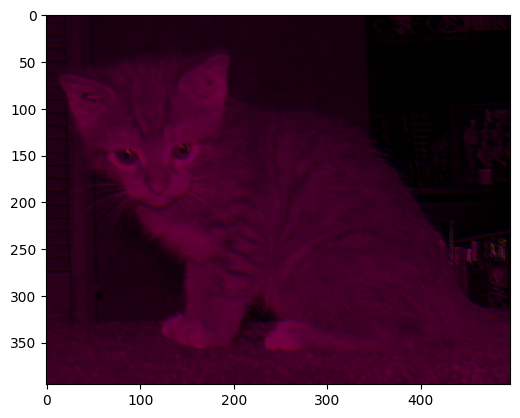

In [123]:
import tensorflow as tf
image = '/Users/esmaelmoataz/Documents/test1/cats/cat.jpg'
image = tf.keras.utils.load_img(image)
img = tf.keras.utils.img_to_array(image)



img = tf.expand_dims(img,axis=0)
model= tf.keras.Sequential()
model.add(tf.keras.layers.Rescaling(1./255))
model.add(tf.keras.layers.RandomFlip ("horizontal"))
model.add(tf.keras.layers.RandomContrast (0.2))
model1 = tf.keras.Sequential()

model1.add(tf.keras.layers.Conv2D(10,(3,3),activation='relu',input_shape= (395, 496, 3)))
model1.add(model)
model1.add(tf.keras.layers.Conv2D(3,(3,3),activation='relu'))


result = model1(img)
result = np.squeeze(result)
plt.imshow(result)




(80, 80, 3)


/Users/esmaelmoataz/miniforge3/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


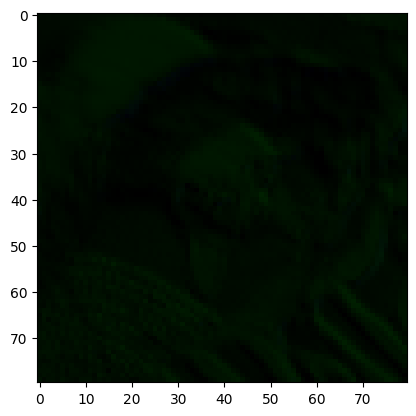

In [183]:
import tensorflow as tf
import pandas as pd
url = '/Users/esmaelmoataz/Documents/test1/cats/whats nat 6 cat.jpeg'
image = tf.keras.utils.load_img(url)
img = tf.keras.utils.img_to_array(image)
#plt.imshow(img)
img=img/255

Augumentation = tf.keras.Sequential()
Augumentation.add(tf.keras.layers.Resizing(250,250))
Augumentation.add(tf.keras.layers.RandomFlip('vertical'))
Augumentation.add(tf.keras.layers.RandomZoom(0.3))

img = tf.expand_dims(img,axis=0)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(10,(3,3),activation='relu',input_shape= (1200, 1599, 3)))
model.add(Augumentation)
model.add(tf.keras.layers.Conv2D(3,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(3,3))
model.add(tf.keras.layers.Conv2D(30,(3,3),activation='relu'))
model.add(tf.keras.layers.Conv2D(3,(1,1),activation='relu'))
result=model(img)
result=np.squeeze(result)
print(result.shape)
plt.imshow(result)



In [207]:
import tensorflow as tf
import pandas as pd
(x_train,y_train),_ = tf.keras.datasets.fashion_mnist.load_data()
#print(x_train.unique)
print(np.unique(y_train))
x_train=x_train/x_train.max()
Augumentation = tf.keras.Sequential()
Augumentation.add(tf.keras.layers.Resizing(10,10))
Augumentation.add(tf.keras.layers.RandomFlip('vertical'))
Augumentation.add(tf.keras.layers.RandomZoom(0.3))



model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(10,(3,3),activation='relu',input_shape= (10, 10, 1)))
model.add(Augumentation)
model.add(tf.keras.layers.Conv2D(3,(3,3),activation='relu'))
#model.add(tf.keras.layers.MaxPool2D(3,3))
model.add(tf.keras.layers.Conv2D(30,(3,3),activation='relu'))
model.add(tf.keras.layers.Conv2D(3,(1,1),activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(30,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='relu'))
model.compile (loss='sparse_categorical_crossentropy',metrics=['Accuracy'],optimizer = 'adam')
# print(y_train.shape)
# print(x_train.shape)
model.fit(x_train,y_train,epochs=100)
#result=model(x_train)
#result=np.squeeze(result)
# print(result.shape)
# plt.imshow(result[i])



[0 1 2 3 4 5 6 7 8 9]
Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - Accuracy: 0.1043 - loss: 2.6053
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - Accuracy: 0.0991 - loss: 2.3026
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - Accuracy: 0.0996 - loss: 2.3026
Epoch 4/100
 454/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - Accuracy: 0.1023 - loss: 2.3026

KeyboardInterrupt: 

In [235]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Reshape, Conv2DTranspose

# Define the Encoder with 'valid' padding for some layers
encoder = Sequential([
    Input(shape=(32, 32, 3)),                    
    
    Conv2D(32, (3, 3), activation='relu', padding='valid'),   
    Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),  
    Conv2D(8, (3, 3), activation='relu', padding='valid', strides=1),  
    Conv2D(8, (3, 3), activation='relu', padding='same', strides=2), 
    
    Flatten(),                                    # Flatten for dense layer
    Dense(5, activation='relu')                   # Final dense layer compresses to 5 values (latent space)
])

# Print the encoder summary to see the architecture
encoder.summary()

# Print the encoder summary to check the architecture
decoder = Sequential()
decoder.add( tf.keras.layers.Input(shape=(5,)))                 
decoder.add( tf.keras.layers.Dense(7*7*8, activation='relu'))
decoder.add(tf.keras.layers.Reshape((7,7,8)))

decoder.add(tf.keras.layers.Conv2DTranspose(8, (3, 3), activation='relu', padding='same', strides=2))


decoder.add(tf.keras.layers.Conv2DTranspose(16, (3, 3), activation='relu', padding='valid', strides=1))

decoder.add(tf.keras.layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='Same', strides=2)) 
decoder.summary()
#decoder.add(tf.keras.layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same', strides=1))
    




Model: "sequential_250"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_248 (Conv2D)             │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_249 (Conv2D)             │ (None, 15, 15, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_250 (Conv2D)             │ (None, 13, 13, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_251 (Conv2D)             │ (None, 7, 7, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_29 (Flatten)            │ (None, 392)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 5)              │         1,965 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,229 (36.05 KB)

 Trainable params: 9,229 (36.05 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_251"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                │ (None, 392)            │         2,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_10 (Reshape)            │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_40             │ (None, 14, 14, 8)      │           584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_41             │ (None, 16, 16, 16)     │         1,168 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_42             │ (None, 32, 32, 32)     │         4,640 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,744 (34.16 KB)

 Trainable params: 8,744 (34.16 KB)

 Non-trainable params: 0 (0.00 B)

# Task 2

Create an autoencoder for MNIST fashion dataset. The input and the output is the same image of a number 28x28 pixels.



In [ ]:
# Example
import tensorflow as tf
import numpy as np
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

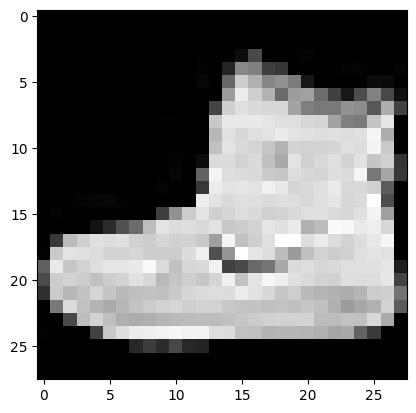

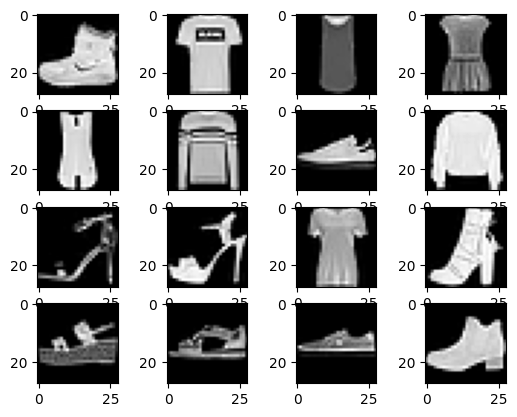

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm

img = train_images[0]
imgplot = plt.imshow(img, cmap='gray')
plt.show()

fig, plots = plt.subplots(4,4)
for i in range(4):
  for j in range(4):
    img = train_images[i*4+j]
    plots[i][j].imshow(img, cmap='gray')
plt.show()

In [ ]:
import random as rnd

t_x = []
t_y = []
sz = len(train_images)
for i in range(100):
   idx = rnd.randint(0,sz-1)
   for c in range(10):
     while train_labels[idx] != c:
       idx = rnd.randint(0,sz-1)
     t_x += [np.ndarray.flatten(train_images[idx])]
     t_y += [train_labels[idx]]

t_x = np.array(t_x, dtype=np.float32)/255.0
t_y = np.array(t_y, dtype=np.int32).reshape(-1,1)


In [ ]:
t_y.shape, t_x.shape

((1000, 1), (1000, 784))

In [ ]:
np.unique(t_y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32),
 array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100]))


## Subtask 1

 Use two dense layers (hidden and output). Hidden layer with 2 neurons, output layer with 784 neurons. Plot the response of hidden neurons in scatter plot, number categories distinquish by colors.


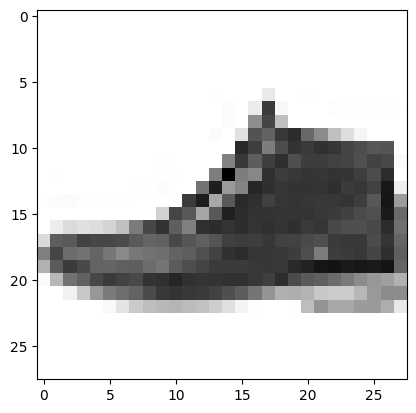

In [ ]:
plt.imshow(t_x[199].reshape(28,28),cmap='Greys')

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Softmax, Dropout, Input

model = Sequential([
    Input(shape=(784,)),
    Dense(2,'relu'),
    Dense(784, activation='sigmoid')
])


model.summary()

Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_174 (Dense)                    │ (None, 2)                   │           1,570 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_175 (Dense)                    │ (None, 784)                 │           2,352 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,922 (15.32 KB)

 Trainable params: 3,922 (15.32 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
             loss='mse',
              metrics=['mse'])
history=model.fit(t_x,
                  t_x,
                  epochs=10,
                  batch_size=20,
                  validation_split=0.2)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1608 - mse: 0.1608 - val_loss: 0.0948 - val_mse: 0.0948
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0914 - mse: 0.0914 - val_loss: 0.0750 - val_mse: 0.0750
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0748 - mse: 0.0748 - val_loss: 0.0675 - val_mse: 0.0675
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0714 - mse: 0.0714 - val_loss: 0.0664 - val_mse: 0.0664
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0681 - mse: 0.0681 - val_loss: 0.0654 - val_mse: 0.0654
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0663 - mse: 0.0663 - val_loss: 0.0651 - val_mse: 0.0651
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0661 - mse: 0.0661 - val_loss: 0.0646 - val_mse: 0.0646
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0642 - mse: 0.0642 - val_loss: 0.0643 - val_mse: 0.0643
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0655 - mse: 

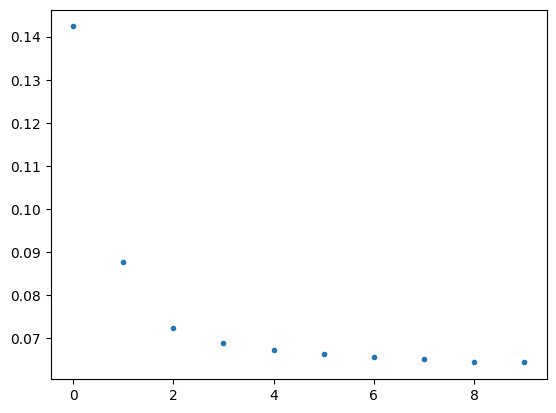

In [ ]:
plt.plot(history.history['loss'],'.')
# plt.plot(history.history['val_loss'])
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


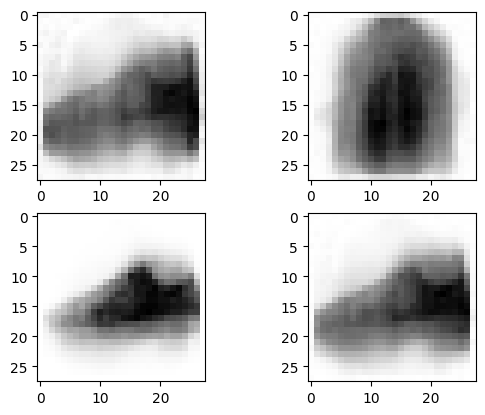

In [ ]:
hidden_out = model.predict(t_x[25:25+4])

_, axes = plt.subplots(2,2)
k=0
for i in range(2):
  for j in range(2):
    axes[i][j].imshow(hidden_out[k].reshape(28,28),cmap='Greys')
    k+=1

In [ ]:
model.predict(t_x[:2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[0.00118986, 0.00145522, 0.0004468 , ..., 0.00172509, 0.00011553,
        0.00021037],
       [0.00153682, 0.00186344, 0.00060198, ..., 0.00219543, 0.00016473,
        0.00029244]], dtype=float32)


## Subtask 2

Modify Subtask 1 so that you add three hidden layers and 2 latent features, i.e.
784-10-2-10-784 neurons. Observe differences.



In [ ]:
model = Sequential([
    Input(shape=(784,)),
    Dense(10),
    Dense(2),
    Dense(10),
    Dense(784, activation='sigmoid')
])


model.summary()

Model: "sequential_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_176 (Dense)                    │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_177 (Dense)                    │ (None, 2)                   │              22 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_178 (Dense)                    │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_179 (Dense)                    │ (None, 784)                 │           8,624 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,526 (64.55 KB)

 Trainable params: 16,526 (64.55 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1535 - mse: 0.1535 - val_loss: 0.0954 - val_mse: 0.0954
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0908 - mse: 0.0908 - val_loss: 0.0790 - val_mse: 0.0790
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0781 - mse: 0.0781 - val_loss: 0.0693 - val_mse: 0.0693
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0708 - mse: 0.0708 - val_loss: 0.0661 - val_mse: 0.0661
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0677 - mse: 0.0677 - val_loss: 0.0648 - val_mse: 0.0648
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0679 - mse: 0.0679 - val_loss: 0.0637 - val_mse: 0.0637
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0659 - mse: 0.0659 - val_loss: 0.0629 - val_mse: 0.0629
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0639 - mse: 0.0639 - val_loss: 0.0621 - val_mse: 0.0621
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0640 - mse:

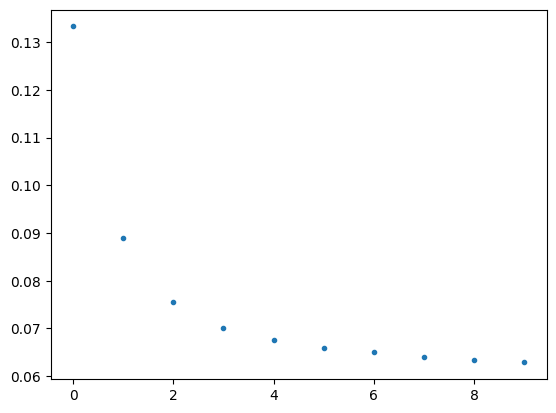

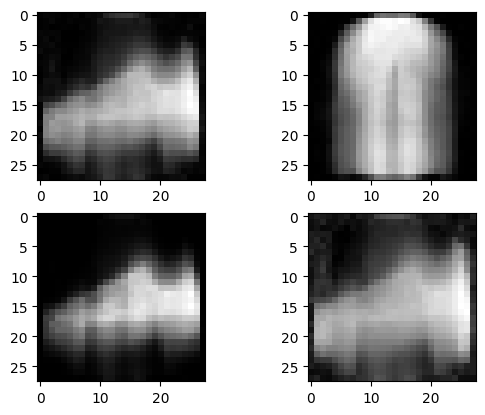

In [ ]:
def train(model, x):
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse',
                metrics=['mse'])
  history=model.fit(x,
                    x,
                    epochs=10,
                    batch_size=20,
                    validation_split=0.2)
  plt.plot(history.history['loss'],'.', label='train_loss')
  return model


def plot_results(model, imgs):
  _, axes = plt.subplots(2,2)
  hidden_out = model.predict(imgs[15:15+4])
  k = 0
  for i in range(2):
    for j in range(2):
      axes[i][j].imshow(hidden_out[k].reshape(28,28),cmap='gray')
      k += 1

model = train(model, t_x)
plot_results(model, t_x)

## Subtask 3

Modify Subtask 1 so that you add convolution layers, pooling layers, ... for the autoencoder and observe differences.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_185 (Dense)                    │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_38 (Reshape)                 │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_61 (Conv2D)                   │ (None, 26, 26, 20)          │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 13, 13, 20)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_51 (Flatten)                 │ (None, 3380)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_186 (Dense)                    │ (None, 400)                 │       1,352,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_187 (Dense)                    │ (None, 10)                  │           4,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_188 (Dense)                    │ (None, 400)                 │           4,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_39 (Reshape)                 │ (None, 20, 20, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_26 (UpSampling2D)      │ (None, 40, 40, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_62 (Conv2D)                   │ (None, 38, 38, 10)          │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_52 (Flatten)                 │ (None, 14440)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_189 (Dense)                    │ (None, 784)                 │      11,321,744 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,298,294 (50.73 MB)

 Trainable params: 13,298,294 (50.73 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 303ms/step - loss: 0.1344 - mse: 0.1344 - val_loss: 0.0746 - val_mse: 0.0746
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 284ms/step - loss: 0.0593 - mse: 0.0593 - val_loss: 0.0404 - val_mse: 0.0404
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 280ms/step - loss: 0.0357 - mse: 0.0357 - val_loss: 0.0303 - val_mse: 0.0303
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 295ms/step - loss: 0.0290 - mse: 0.0290 - val_loss: 0.0291 - val_mse: 0.0291
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 275ms/step - loss: 0.0269 - mse: 0.0269 - val_loss: 0.0267 - val_mse: 0.0267
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 287ms/step - loss: 0.0260 - mse: 0.0260 - val_loss: 0.0262 - val_mse: 0.0262
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 286ms/step - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 255ms/step - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0246 - val_mse: 0.0246
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 274ms/

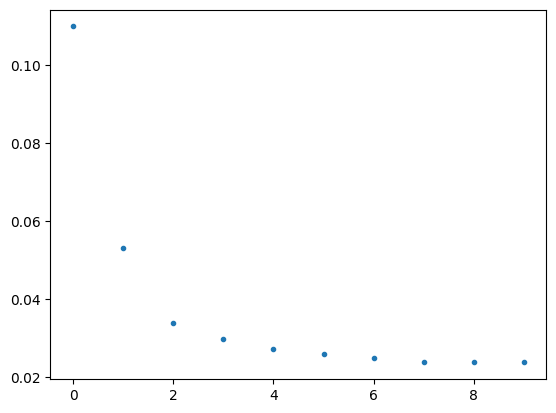

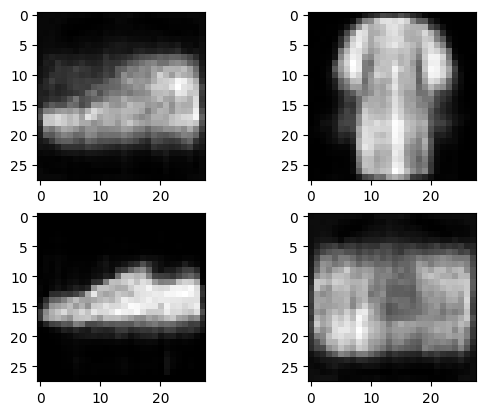

In [ ]:
from tensorflow.keras.layers import Flatten, Reshape, UpSampling2D
model = Sequential([
    Input(shape=(784,)),
    Dense(784),
    Reshape((28,28,1)),
    Conv2D(20, kernel_size=(3,3), strides=1, input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(400),
    Dense(10),
    Dense(400),
    Reshape((20,20,1)),
    UpSampling2D(),
    Conv2D(10, kernel_size=(3,3)),
    Flatten(),
    Dense(784, activation='sigmoid'),
])


model.summary()

model = train(model,t_x)
plot_results(model, t_x)


## Subtask 4

Extract the decoder from the autoencoder of subtask 1-3 and generate new images based on randomly generated latent features. Plot generated images.



In [ ]:
enc_model = tf.keras.models.Model(inputs=model.layers[0].input, outputs=model.layers[6].output)
enc_model.summary()
dec_model = tf.keras.models.Model(inputs=model.layers[7].input, outputs=model.layers[-1].output)
dec_model.summary()

Model: "functional_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_52 (InputLayer)          │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_185 (Dense)                    │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_38 (Reshape)                 │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_61 (Conv2D)                   │ (None, 26, 26, 20)          │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 13, 13, 20)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_51 (Flatten)                 │ (None, 3380)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_186 (Dense)                    │ (None, 400)                 │       1,352,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_187 (Dense)                    │ (None, 10)                  │           4,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,972,050 (7.52 MB)

 Trainable params: 1,972,050 (7.52 MB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ keras_tensor_395CLONE (InputLayer)   │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_188 (Dense)                    │ (None, 400)                 │           4,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_39 (Reshape)                 │ (None, 20, 20, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_26 (UpSampling2D)      │ (None, 40, 40, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_62 (Conv2D)                   │ (None, 38, 38, 10)          │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_52 (Flatten)                 │ (None, 14440)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_189 (Dense)                    │ (None, 784)                 │      11,321,744 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,326,244 (43.21 MB)

 Trainable params: 11,326,244 (43.21 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
op_img = dec_model.predict(np.random.rand(5).reshape(-1,5))
plt.imshow(op_img.reshape(28,28), cmap='Greys')

ValueError: Input 0 of layer "functional_56" is incompatible with the layer: expected shape=(None, 10), found shape=(1, 5)

In [ ]:
np.ones(5)

array([1., 1., 1., 1., 1.])